In [36]:
import pickle


import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [4]:
train_data = pd.read_csv("avila/avila-tr.txt", sep=",",header = None)
train_data.columns = ["intercolumnar distance","upper margin","lower margin","exploitation","row number","modular ratio","interlinear spacing","weight","peak number","modular ratio/ interlinear spacing","Class"]

In [5]:
train_data

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [6]:
test_data = pd.read_csv("avila/avila-ts.txt", sep=",",header = None)
test_data.columns = ["intercolumnar distance","upper margin","lower margin","exploitation","row number","modular ratio","interlinear spacing","weight","peak number","modular ratio/ interlinear spacing","Class"]

In [7]:
test_data

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [8]:
X_train = train_data[["intercolumnar distance","upper margin","lower margin","exploitation","row number","modular ratio","interlinear spacing","weight","peak number","modular ratio/ interlinear spacing"]]
Y_train = train_data["Class"]

In [9]:
Y_train

0        A
1        A
2        A
3        A
4        F
        ..
10425    F
10426    F
10427    A
10428    E
10429    X
Name: Class, Length: 10430, dtype: object

In [10]:
X_test = test_data[["intercolumnar distance","upper margin","lower margin","exploitation","row number","modular ratio","interlinear spacing","weight","peak number","modular ratio/ interlinear spacing"]]
Y_test = test_data["Class"]

## Features disparity per class

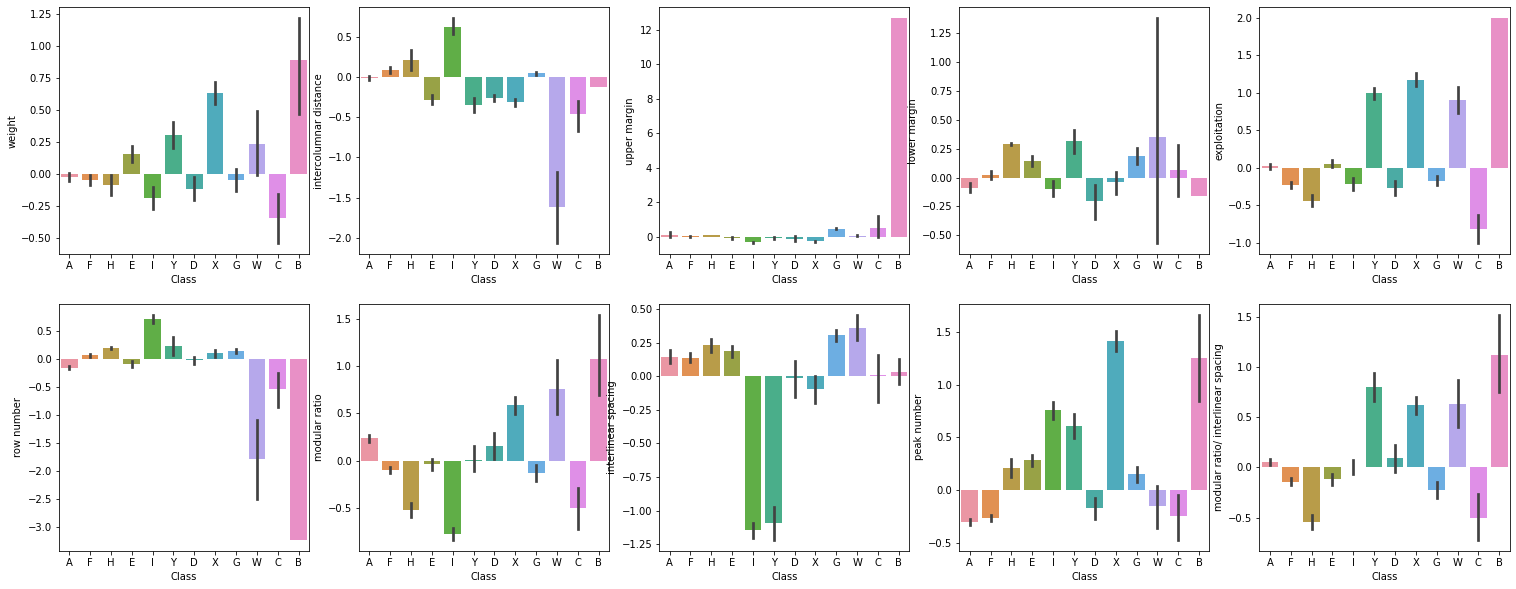

In [11]:

fig, axes = plt.subplots(2,5,figsize=(26,10))
sns.barplot(ax = axes[0,0], y=train_data["weight"], x = train_data["Class"])
sns.barplot(ax = axes[0,1],y=train_data["intercolumnar distance"], x = train_data["Class"])
sns.barplot(ax = axes[0,2],y=train_data["upper margin"], x = train_data["Class"])
sns.barplot(ax = axes[0,3],y=train_data["lower margin"], x = train_data["Class"])
sns.barplot(ax = axes[0,4],y=train_data["exploitation"], x = train_data["Class"])
sns.barplot(ax = axes[1,0],y=train_data["row number"], x = train_data["Class"])
sns.barplot(ax = axes[1,1],y=train_data["modular ratio"], x = train_data["Class"])
sns.barplot(ax = axes[1,2],y=train_data["interlinear spacing"], x = train_data["Class"])
sns.barplot(ax = axes[1,3],y=train_data["peak number"], x = train_data["Class"])
sns.barplot(ax = axes[1,4],y=train_data["modular ratio/ interlinear spacing"], x = train_data["Class"])

## Correlation matrix

[Text(0.5, 0, 'intercolumnar distance'),
 Text(1.5, 0, 'upper margin'),
 Text(2.5, 0, 'lower margin'),
 Text(3.5, 0, 'exploitation'),
 Text(4.5, 0, 'row number'),
 Text(5.5, 0, 'modular ratio'),
 Text(6.5, 0, 'interlinear spacing'),
 Text(7.5, 0, 'weight'),
 Text(8.5, 0, 'peak number'),
 Text(9.5, 0, 'modular ratio/ interlinear spacing')]

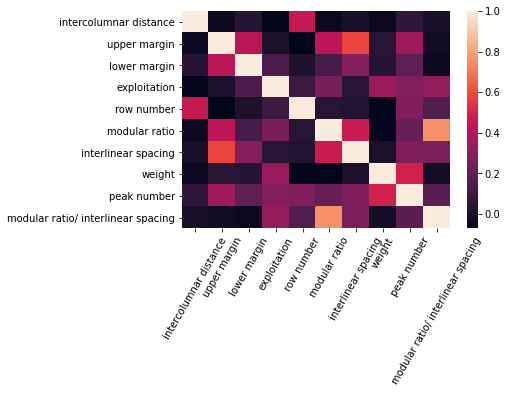

In [88]:
map = sns.heatmap(X_train.corr())
map.set_xticklabels(test_data.columns[:-1], rotation = 60)

## Linear Discriminant Analysis

In [13]:
lda = LinearDiscriminantAnalysis(n_components=7)

X_trainlda = lda.fit(X_train, Y_train).transform(X_train)
X_testlda = lda.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors =5, metric = 'minkowski', p = 2)
classifier.fit(X_trainlda, Y_train)
pred = classifier.predict(X_testlda)

accuracy_score(Y_test, pred)

0.6996263294050015

In [27]:
Y_test

0        W
1        A
2        I
3        E
4        A
        ..
10432    X
10433    G
10434    A
10435    F
10436    H
Name: Class, Length: 10437, dtype: object

#### Confusion Matrix

[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'B'),
 Text(0, 2.5, 'C'),
 Text(0, 3.5, 'D'),
 Text(0, 4.5, 'E'),
 Text(0, 5.5, 'F'),
 Text(0, 6.5, 'G'),
 Text(0, 7.5, 'H'),
 Text(0, 8.5, 'I'),
 Text(0, 9.5, 'W'),
 Text(0, 10.5, 'X'),
 Text(0, 11.5, 'Y')]

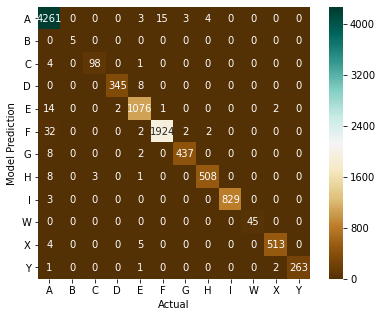

In [72]:
cfmat = confusion_matrix(Y_test, pred)
plt.figure(figsize=(7, 5))
cfmat_viz = sns.heatmap(cfmat,square = True, annot = True,fmt = 'd',cbar = True, cmap=plt.cm.BrBG)
cfmat_viz.set_xlabel('Actual')
cfmat_viz.set_ylabel('Model Prediction')
copysist_label = ['A','B','C','D','E','F','G','H','I','W','X','Y']
cfmat_viz.set_xticklabels(copysist_label)
cfmat_viz.set_yticklabels(copysist_label)
cfmat_viz.set_yticklabels(copysist_label,rotation = 0)

#### LDA Cross-validation

In [25]:
cvlda = cross_val_score(classifier, X_testlda, Y_test, cv=5)
cvlda

array([0.70315488, 0.71640363, 0.7042186 , 0.69193858, 0.6828215 ])

## Decision Tree

In [46]:
classifierDT = tree.DecisionTreeClassifier()
classifierDT = classifierDT.fit(X_train, Y_train)

test_pred = classifierDT.predict(X_test)

accuracy_score(Y_test, test_pred)



0.9695314745616557

#### Confusion Matrix

[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'B'),
 Text(0, 2.5, 'C'),
 Text(0, 3.5, 'D'),
 Text(0, 4.5, 'E'),
 Text(0, 5.5, 'F'),
 Text(0, 6.5, 'G'),
 Text(0, 7.5, 'H'),
 Text(0, 8.5, 'I'),
 Text(0, 9.5, 'W'),
 Text(0, 10.5, 'X'),
 Text(0, 11.5, 'Y')]

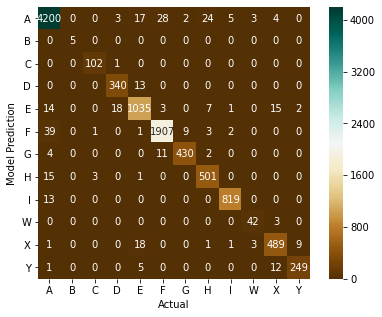

In [71]:
cfmat = confusion_matrix(Y_test, test_pred)
plt.figure(figsize=(7, 5))
cfmat_viz = sns.heatmap(cfmat,square = True, annot = True,fmt = 'd',cbar = True, cmap=plt.cm.BrBG)
cfmat_viz.set_xlabel('Actual')
cfmat_viz.set_ylabel('Model Prediction')
copysist_label = ['A','B','C','D','E','F','G','H','I','W','X','Y']
cfmat_viz.set_xticklabels(copysist_label)
cfmat_viz.set_yticklabels(copysist_label)
cfmat_viz.set_yticklabels(copysist_label,rotation = 0)

#### Decision Tree Cross-validation

In [13]:
cvdt = cross_val_score(classifierDT, X_test, Y_test, cv=5)
cvdt

array([0.96606119, 0.95265423, 0.93815916, 0.96353167, 0.94865643])

## Random Forest

In [49]:
classifierRF = RandomForestClassifier()
classifierRF.fit(X_train,Y_train)

C:\Users\Jules\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
pred = classifierRF.predict(X_test)

accuracy_score(Y_test,pred)

0.9677110280732011

#### Confusion Matrix

[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'B'),
 Text(0, 2.5, 'C'),
 Text(0, 3.5, 'D'),
 Text(0, 4.5, 'E'),
 Text(0, 5.5, 'F'),
 Text(0, 6.5, 'G'),
 Text(0, 7.5, 'H'),
 Text(0, 8.5, 'I'),
 Text(0, 9.5, 'W'),
 Text(0, 10.5, 'X'),
 Text(0, 11.5, 'Y')]

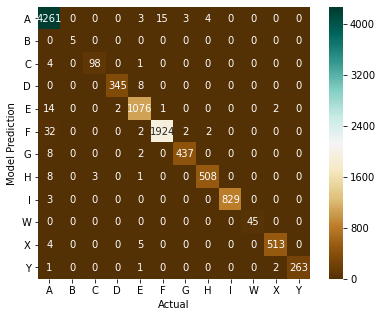

In [70]:
cfmat = confusion_matrix(Y_test, pred)
plt.figure(figsize=(7, 5))
cfmat_viz = sns.heatmap(cfmat,square = True, annot = True,fmt = 'd',cbar = True, cmap=plt.cm.BrBG)
cfmat_viz.set_xlabel('Actual')
cfmat_viz.set_ylabel('Model Prediction')
copysist_label = ['A','B','C','D','E','F','G','H','I','W','X','Y']
cfmat_viz.set_xticklabels(copysist_label)
cfmat_viz.set_yticklabels(copysist_label)
cfmat_viz.set_yticklabels(copysist_label,rotation = 0)

####  We reached the maximum Cross Validation value (cv) equal to 5 because the "B" class have only 5 members 

In [52]:
cvrf = cross_val_score(classifierRF, X_test, Y_test, cv=5)
cvrf

array([0.96271511, 0.94739359, 0.96212848, 0.9659309 , 0.9256238 ])

## Plotting models accuracy

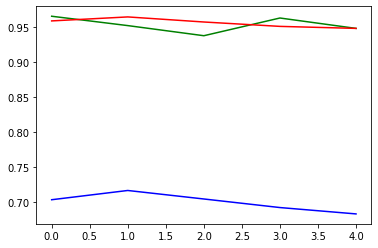

In [17]:
plt.plot(cvdt, color = "green")
plt.plot(cvlda, color = "blue")
plt.plot(cvrf, color = "red")

## Random forest using Grid Search 

In [55]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2],
 'n_estimators': [10,30,50]}
grid = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)




In [56]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [57]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [61]:
clf2 = RandomForestClassifier()
clf2.set_params(**grid.best_params_)
clf2.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=80, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
cvgsrf = cross_val_score(clf2, X_test, Y_test, cv=5)
cvgsrf

array([0.98661568, 0.98708752, 0.99137105, 0.98368522, 0.97600768])

## Compare grid Search with the other models

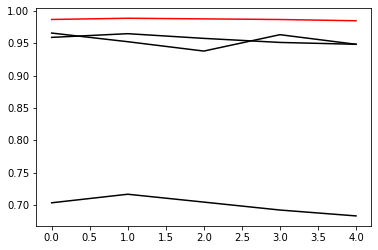

In [24]:
c = "black"
plt.plot(cvdt, color = c)
plt.plot(cvlda, color = c)
plt.plot(cvrf, color = c)
plt.plot(cvgsrf,color = "red")

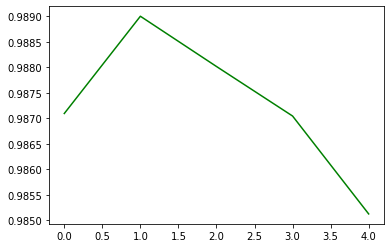

In [32]:
plt.plot(cvgsrf, color = "green")

#### Confusion Matrix

In [62]:
pred = clf2.predict(X_test)

[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'B'),
 Text(0, 2.5, 'C'),
 Text(0, 3.5, 'D'),
 Text(0, 4.5, 'E'),
 Text(0, 5.5, 'F'),
 Text(0, 6.5, 'G'),
 Text(0, 7.5, 'H'),
 Text(0, 8.5, 'I'),
 Text(0, 9.5, 'W'),
 Text(0, 10.5, 'X'),
 Text(0, 11.5, 'Y')]

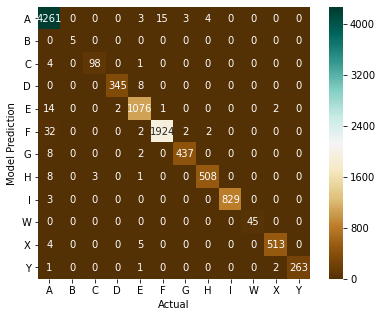

In [69]:
cfmat = confusion_matrix(Y_test, pred)
plt.figure(figsize=(7, 5))
cfmat_viz = sns.heatmap(cfmat,square = True, annot = True,fmt = 'd',cbar = True, cmap=plt.cm.BrBG)
cfmat_viz.set_xlabel('Actual')
cfmat_viz.set_ylabel('Model Prediction')
copysist_label = ['A','B','C','D','E','F','G','H','I','W','X','Y']

cfmat_viz.set_xticklabels(copysist_label)
cfmat_viz.set_yticklabels(copysist_label,rotation = 0)

In [25]:
pickle.dump( clf2, open( 'clf2' + ".p", "wb" ) )